<b>PREDICTING HOUSE PRICES</b>

It has more features and not enough data, Linear Regression without regularization should suffer from curse of dimensionality as there are many categorical variables as well and OneHotEncoding is something that we will be doing!

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',82)

data = pd.read_csv('data.csv')

print(data.shape,'\n')

data.head()

(1460, 81) 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<b>Feature description</b>

In [3]:
description = open('data_description.txt','r')
for i in description.readlines():
    print(i)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

Remove variables with too many NA's:

<b>Missing Categorical values:

In [4]:
data.loc[:,(data.isna().sum() > 0) == True].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<b>Key notes:</b>

1) LotFrontage missing values probably should not mean that there is not frontage, so we will impute by mean.

2) MasVnrType missing values probably should not mean that there is not frontage, so we will impute by mode. This is because masonry veneer is made for supporting the house and every house must have one.

2) MasVnrArea missing values probably should not mean that there is not frontage, so we will impute by mean. This is because masonry veneer is made for supporting the house and every house must have one.

3) BsmtQual and BsmtCond are both missing together which possibly means the houses dont have a basement in these cases.

4) 37 cases where BsmtExposure is missing with both BsmtQual and BsmtCond and 1 case where it is alone missing as it anyway means walkout or garden level walls. So cases where all three are missing need to be handled properly by creating a new category. The one case where it is missing when both others are there, we need to put that new type too. Also it is given in these Bsmt variables that NA means no basement. But BsmtFinSFtype1/2 and BsmtType1/2 needs to be handled with mean and mode.

5) Electrical system has to be there in every house so missing values here will be subsituted by mode.

5) NA in the garage variables have to subsituted by a new category except for GarageArea, here we will substitute by mean because its occurence is random.

6) When PoolArea = 0, it means the house doesnt have a Pool annd hence PoolQC there is zero!

<b>Imputing missing values</b>

Creating new categories in the respective variables with respect to the data description!

In [5]:
for i in data.columns:
    
    if i in ['BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','PoolQC', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        
        data[i].replace({np.nan:'Unavailabe'},inplace=True)

        print(data[i].unique())

['Gd' 'TA' 'Ex' 'Unavailabe' 'Fa']
['TA' 'Gd' 'Unavailabe' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'Unavailabe']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'Unavailabe' 'LwQ']
['Unf' 'BLQ' 'Unavailabe' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Unavailabe' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Unavailabe' 'Basment' '2Types']
['RFn' 'Unf' 'Fin' 'Unavailabe']
['TA' 'Fa' 'Gd' 'Unavailabe' 'Ex' 'Po']
['TA' 'Fa' 'Unavailabe' 'Gd' 'Po' 'Ex']
['Unavailabe' 'Ex' 'Fa' 'Gd']


In [6]:
X = data.copy()

Removing variables with too many missing values:

In [7]:
def remove_vars_with_many_nas(df):
    
    nas = df.isnull().sum()/len(df) > 0.5
    
    drop_cols = nas[nas==True].index.tolist()
    
    df.drop(columns=drop_cols, inplace=True)
    
remove_vars_with_many_nas(X)

Mean-mode imputation for the rest of the features!

Column <b>Electrical</b> (categorical) and <b>LotFrontage, MasVnrType, MasVnrArea, GarageYrBlt</b> (numeric) can be Imputed

In [8]:
nas = X.isna().sum()

nas = nas[nas>0].index.tolist()

In [9]:
nas

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [10]:
def impute_nas(df):
    
    remaining_nas = df.isna().sum() > 0
    
    remaining_nas = remaining_nas[remaining_nas == True].index.tolist()
    
    for i in remaining_nas:
        
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            
            df.loc[df[i].isnull(),i] = np.round(df[i].mean(),0)
            
        elif df[i].dtype == 'O':
            
            df.loc[df[i].isnull(),i] = df[i].mode()[0]
            
        else:
            pass
        
    if df.isna().sum().any() == False:
        
        print('Done!')    
        
impute_nas(X)

Done!


<b>EDA</b>

In [11]:
def get_summary(df):
    
    for i in df.columns[1:]:

        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print(i)
            print('Maximum :',df[i].max())
            print('Minimum :', df[i].min())
            print('Mean :',df[i].mean())
            print('Median :',df[i].median())
            print('Mode :',df[i].mode()[0])
            print('\n')

        else:
            print(df[i].value_counts())
            print('\n')
            
get_summary(data)

MSSubClass
Maximum : 190
Minimum : 20
Mean : 56.897260273972606
Median : 50.0
Mode : 20


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


LotFrontage
Maximum : 313.0
Minimum : 21.0
Mean : 70.04995836802665
Median : 69.0
Mode : 60.0


LotArea
Maximum : 215245
Minimum : 1300
Mean : 10516.828082191782
Median : 9478.5
Mode : 7200


Pave    1454
Grvl       6
Name: Street, dtype: int64


Grvl    50
Pave    41
Name: Alley, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     7

Checking the distribution of the target variable

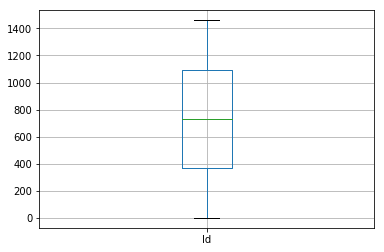

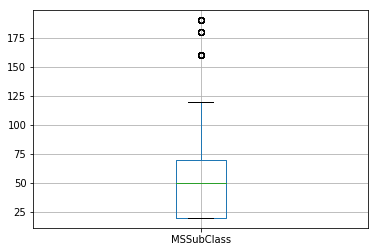

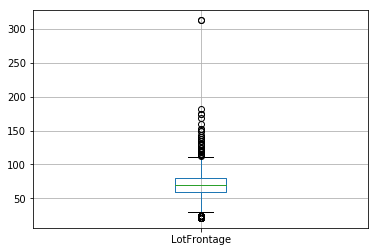

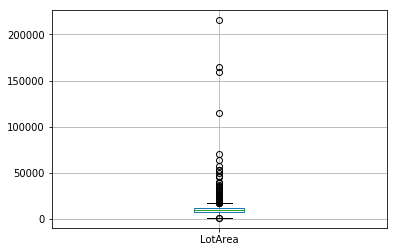

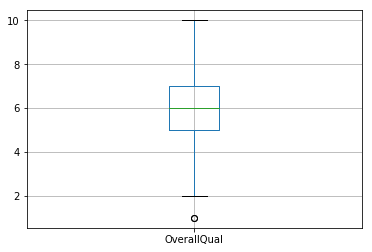

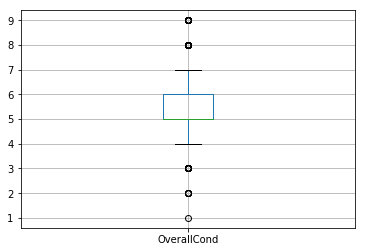

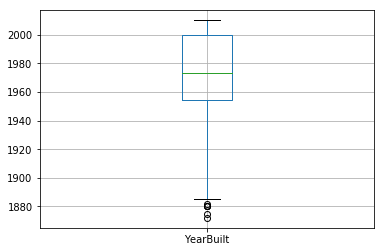

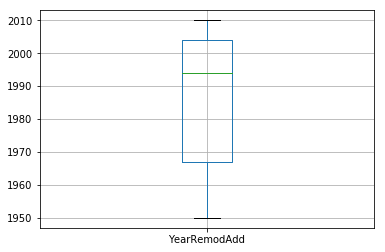

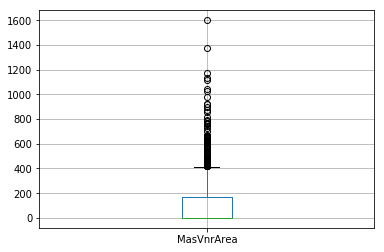

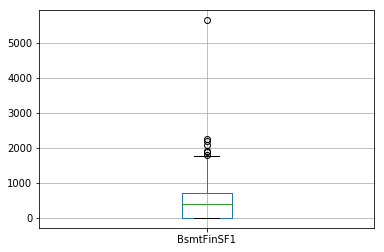

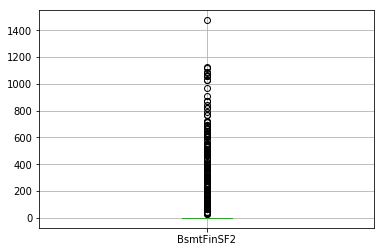

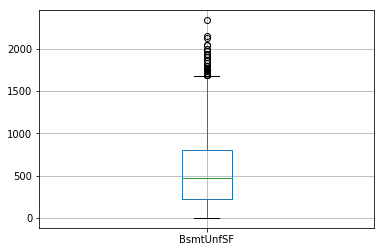

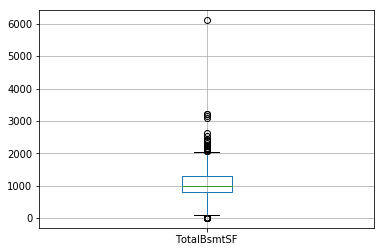

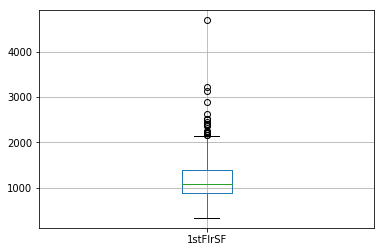

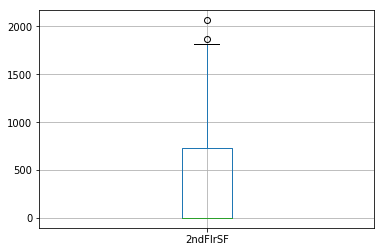

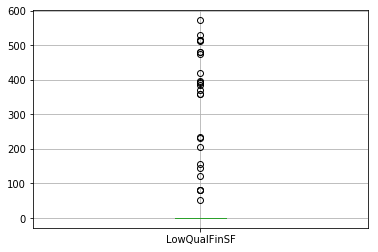

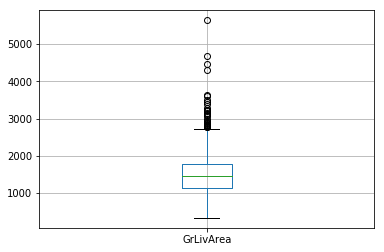

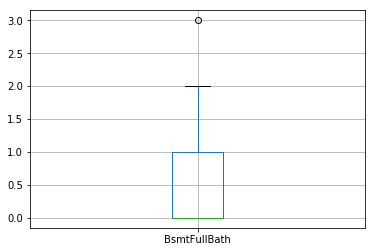

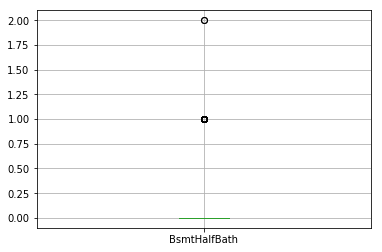

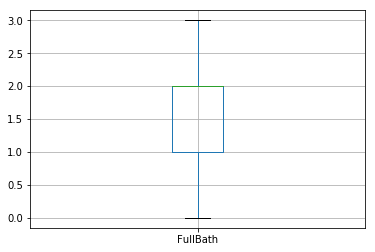

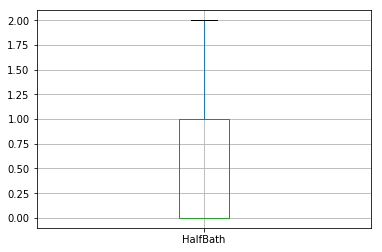

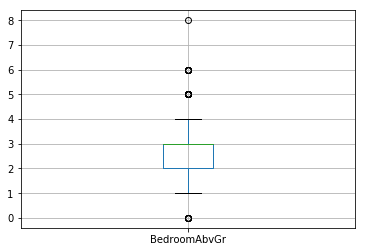

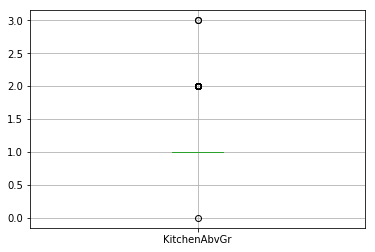

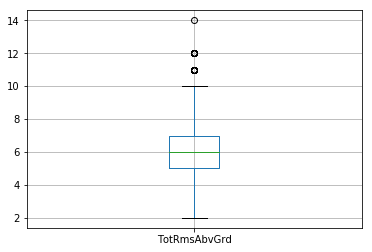

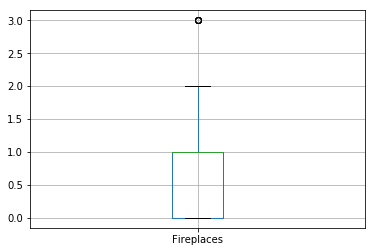

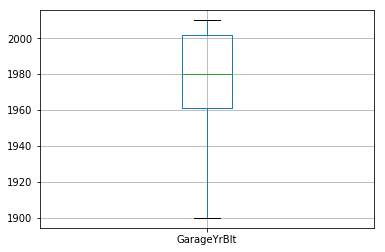

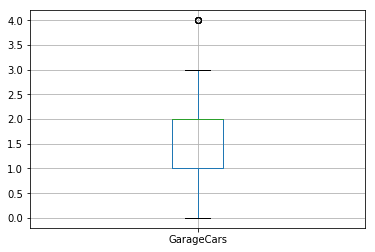

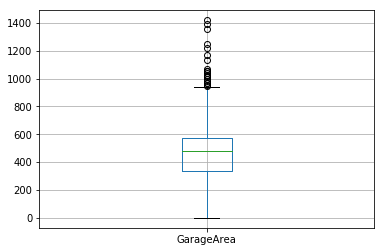

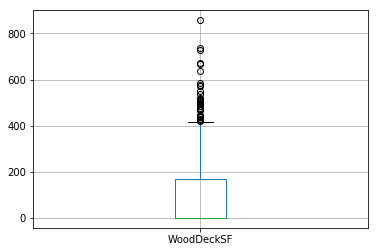

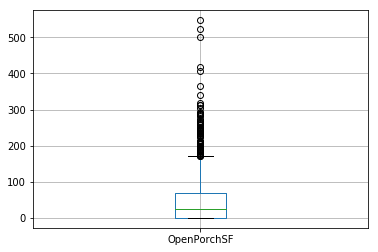

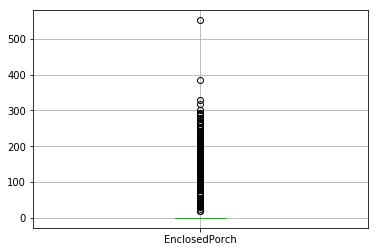

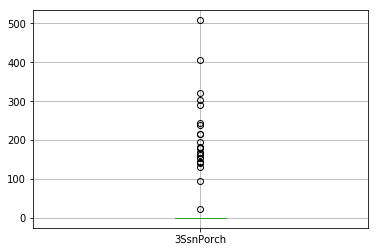

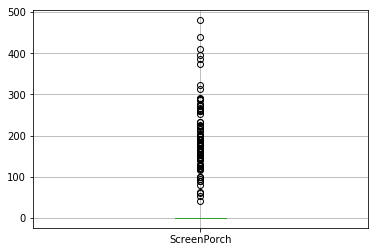

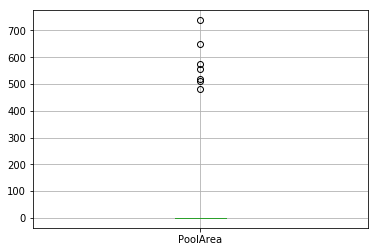

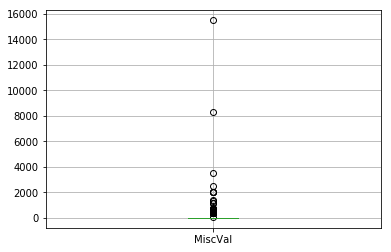

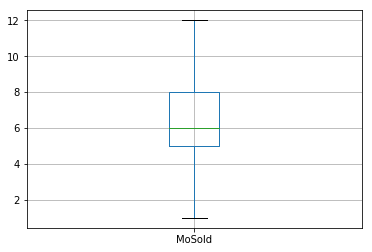

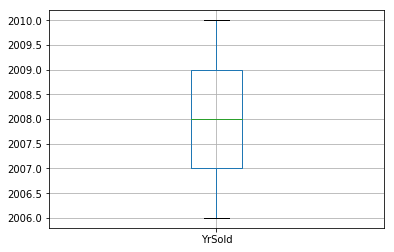

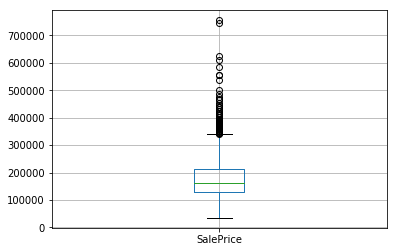

In [12]:
def box(df):
    numerical_cols = df.describe().columns.tolist()
    for i in df.loc[:,numerical_cols]:
        df.boxplot(i)
        plt.show()
        
box(data)

In [13]:
y = data['SalePrice']

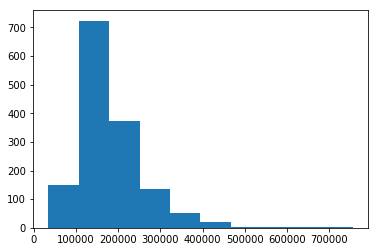

In [14]:
plt.hist(y)
plt.show()

Checking the distribution of the categorical and numeric features!

Histogram of : MSSubClass


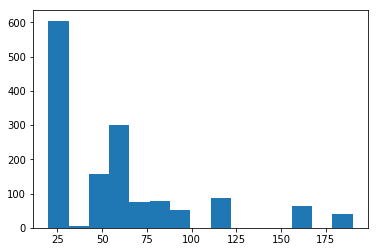

Bar graph of : MSZoning


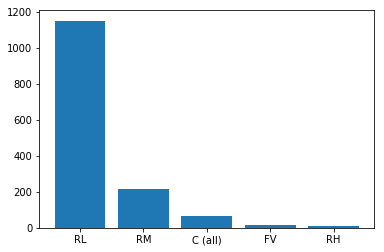

Histogram of : LotFrontage


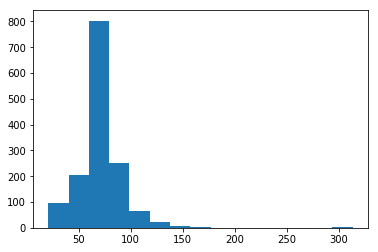

Histogram of : LotArea


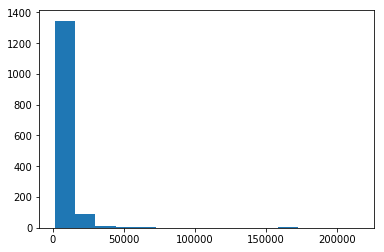

Bar graph of : Street


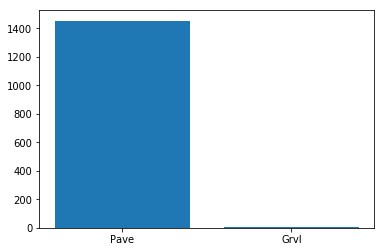

Bar graph of : LotShape


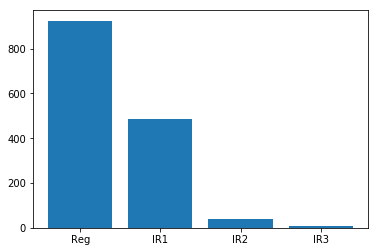

Bar graph of : LandContour


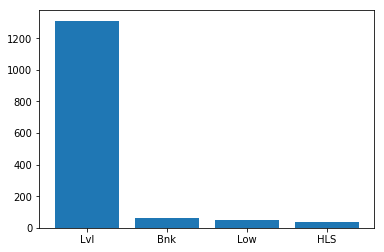

Bar graph of : Utilities


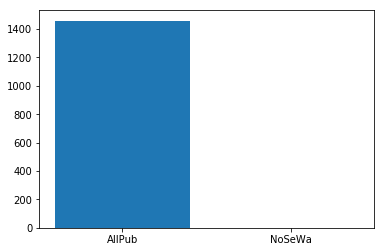

Bar graph of : LotConfig


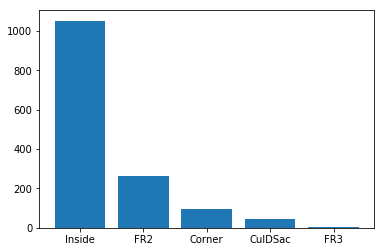

Bar graph of : LandSlope


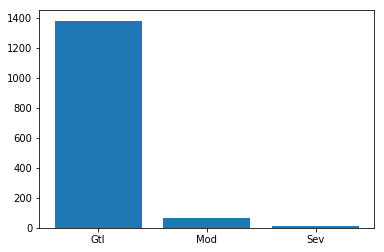

Bar graph of : Neighborhood


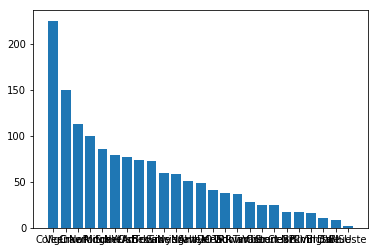

Bar graph of : Condition1


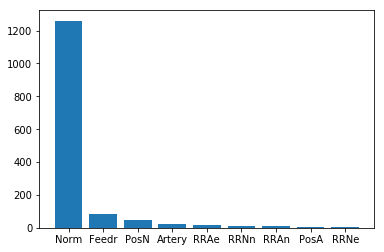

Bar graph of : Condition2


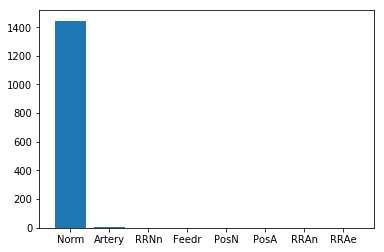

Bar graph of : BldgType


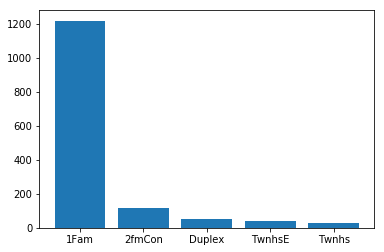

Bar graph of : HouseStyle


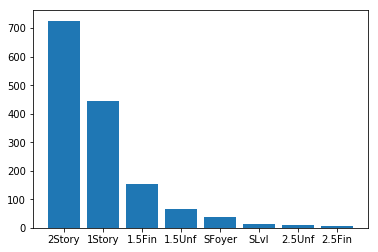

Histogram of : OverallQual


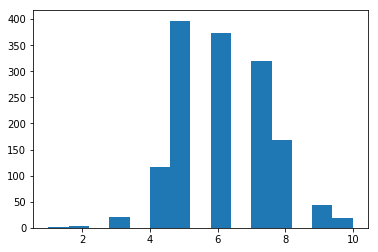

Histogram of : OverallCond


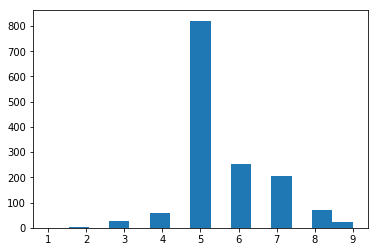

Histogram of : YearBuilt


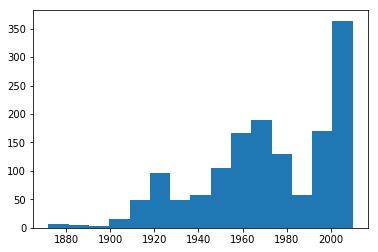

Histogram of : YearRemodAdd


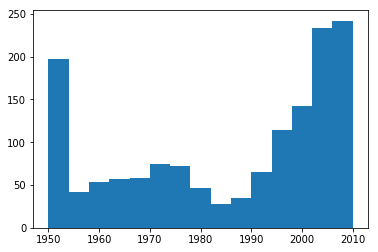

Bar graph of : RoofStyle


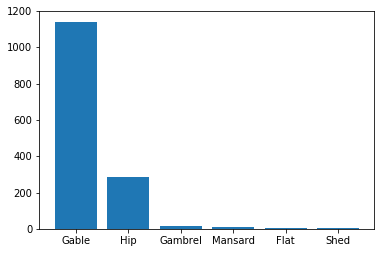

Bar graph of : RoofMatl


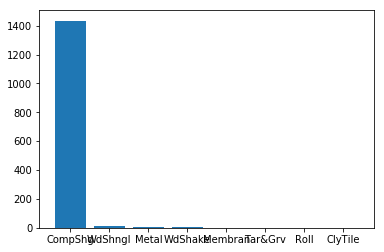

Bar graph of : Exterior1st


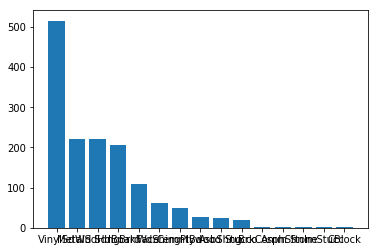

Bar graph of : Exterior2nd


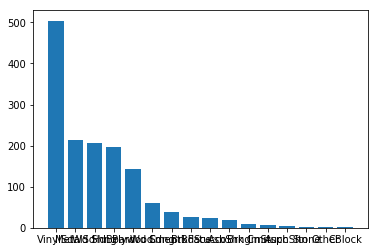

Bar graph of : MasVnrType


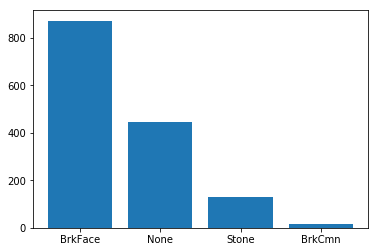

Histogram of : MasVnrArea


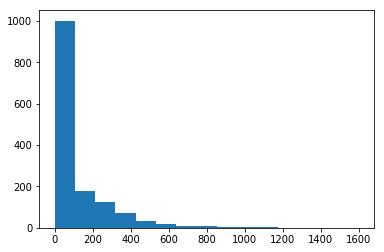

Bar graph of : ExterQual


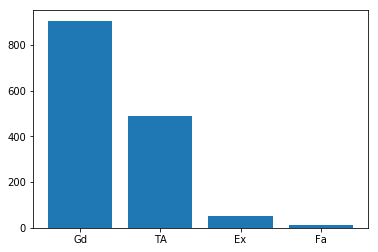

Bar graph of : ExterCond


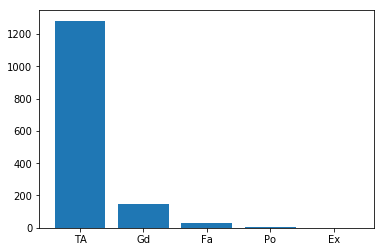

Bar graph of : Foundation


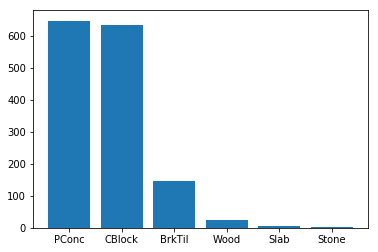

Bar graph of : BsmtQual


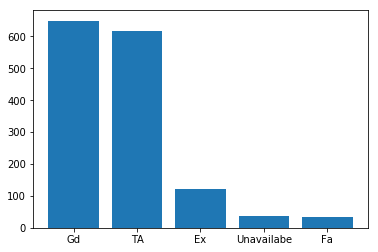

Bar graph of : BsmtCond


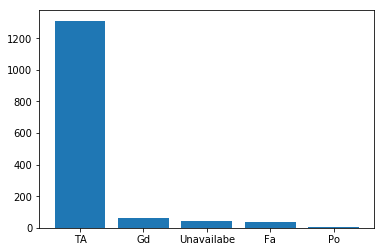

Bar graph of : BsmtExposure


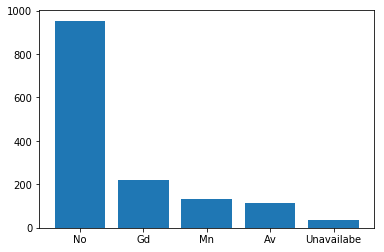

Bar graph of : BsmtFinType1


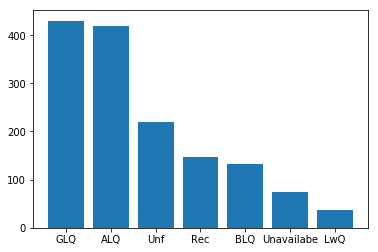

Histogram of : BsmtFinSF1


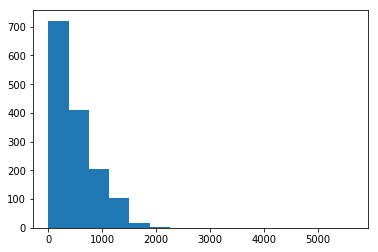

Bar graph of : BsmtFinType2


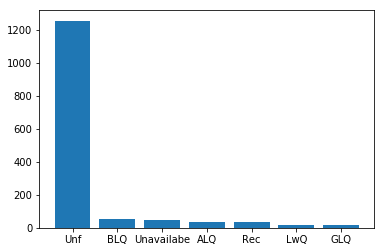

Histogram of : BsmtFinSF2


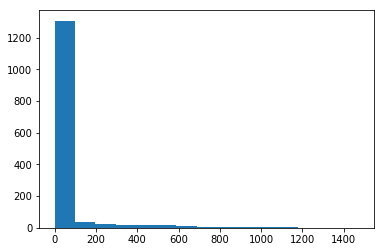

Histogram of : BsmtUnfSF


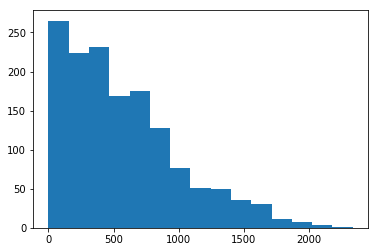

Histogram of : TotalBsmtSF


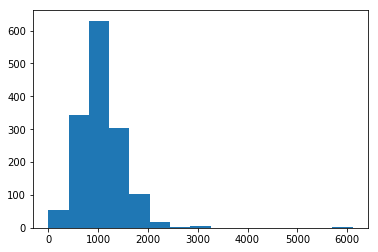

Bar graph of : Heating


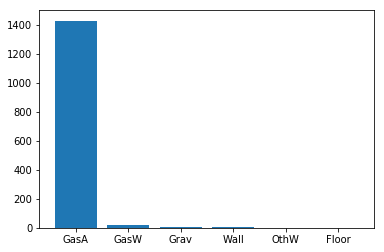

Bar graph of : HeatingQC


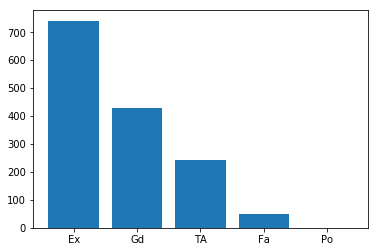

Bar graph of : CentralAir


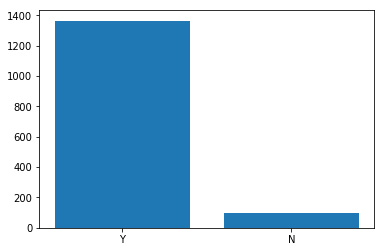

Bar graph of : Electrical


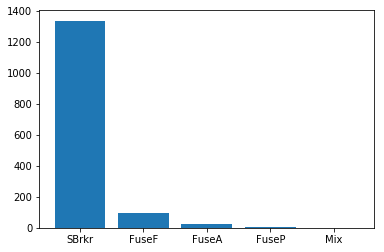

Histogram of : 1stFlrSF


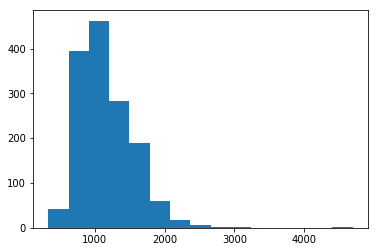

Histogram of : 2ndFlrSF


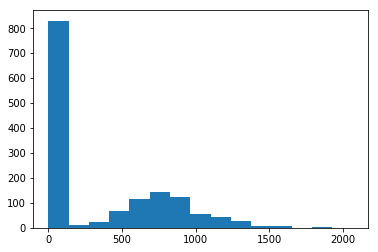

Histogram of : LowQualFinSF


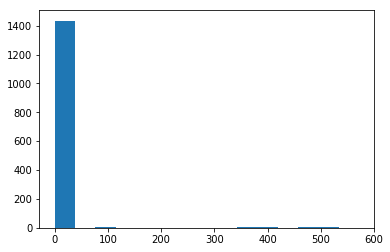

Histogram of : GrLivArea


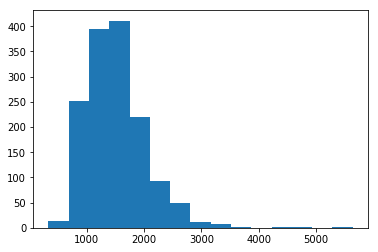

Histogram of : BsmtFullBath


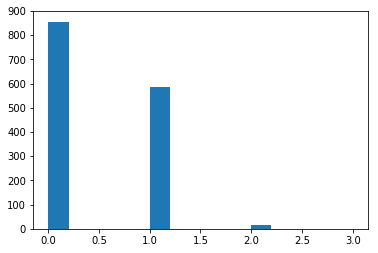

Histogram of : BsmtHalfBath


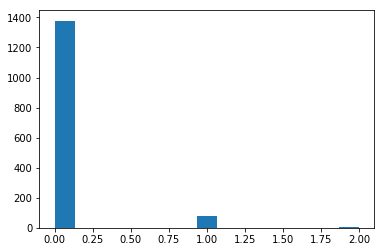

Histogram of : FullBath


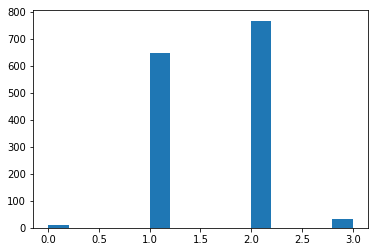

Histogram of : HalfBath


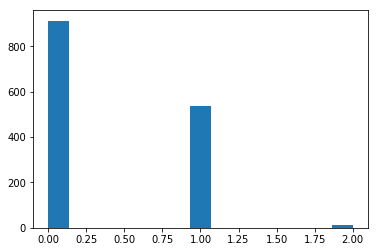

Histogram of : BedroomAbvGr


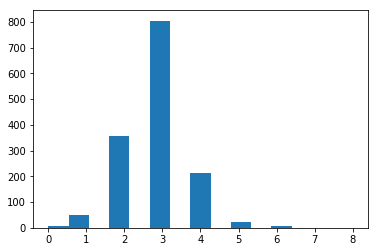

Histogram of : KitchenAbvGr


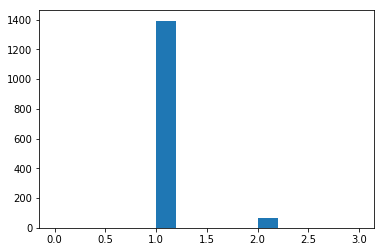

Bar graph of : KitchenQual


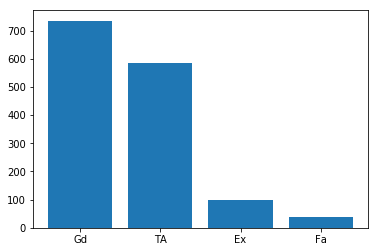

Histogram of : TotRmsAbvGrd


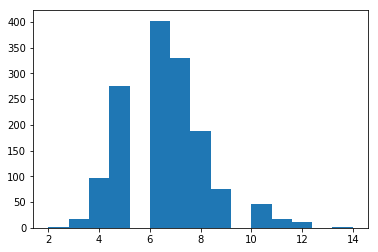

Bar graph of : Functional


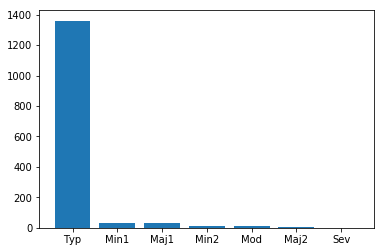

Histogram of : Fireplaces


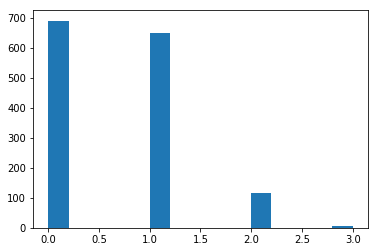

Bar graph of : FireplaceQu


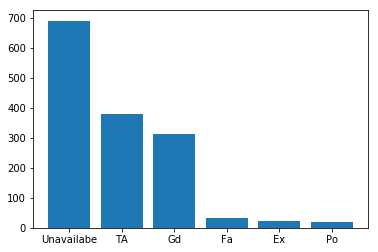

Bar graph of : GarageType


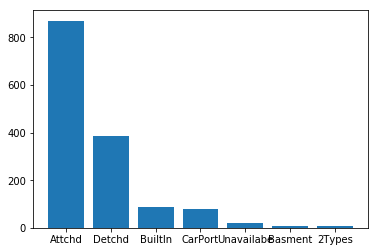

Histogram of : GarageYrBlt


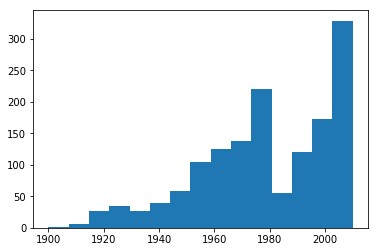

Bar graph of : GarageFinish


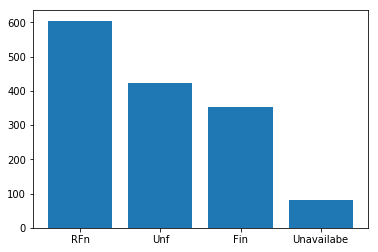

Histogram of : GarageCars


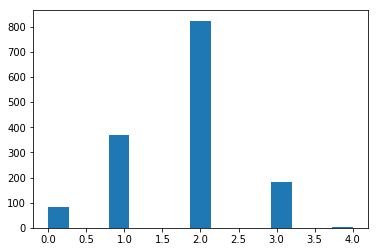

Histogram of : GarageArea


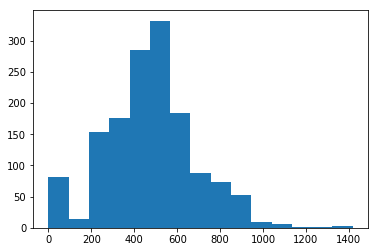

Bar graph of : GarageQual


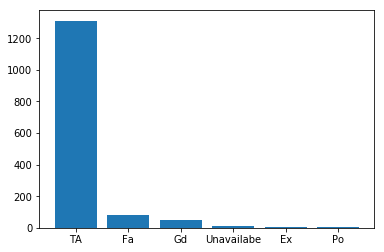

Bar graph of : GarageCond


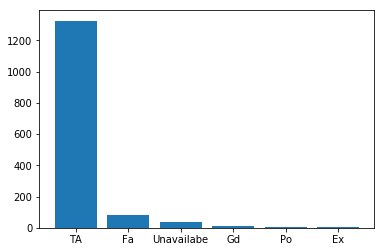

Bar graph of : PavedDrive


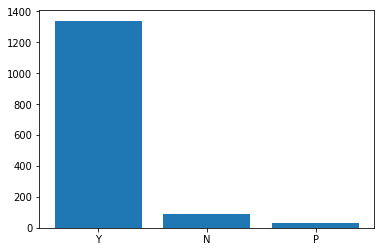

Histogram of : WoodDeckSF


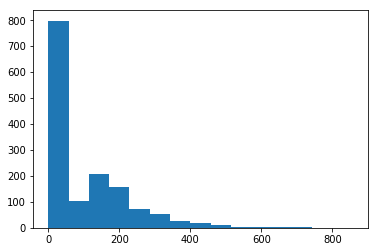

Histogram of : OpenPorchSF


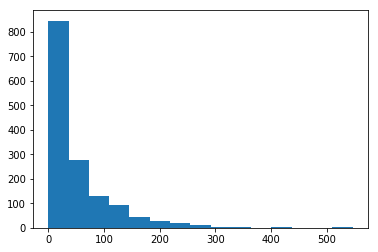

Histogram of : EnclosedPorch


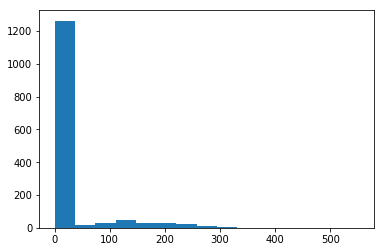

Histogram of : 3SsnPorch


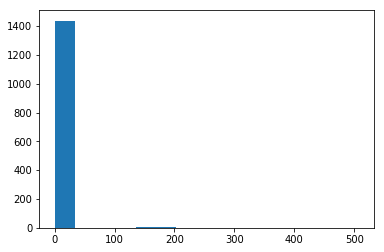

Histogram of : ScreenPorch


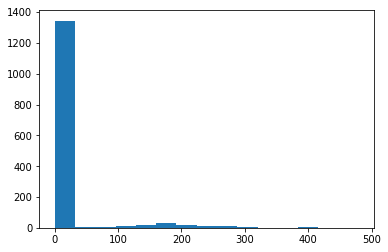

Histogram of : PoolArea


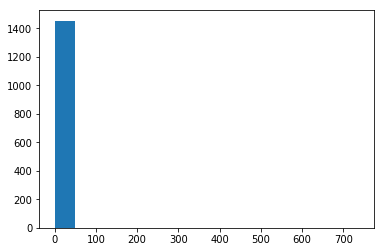

Bar graph of : PoolQC


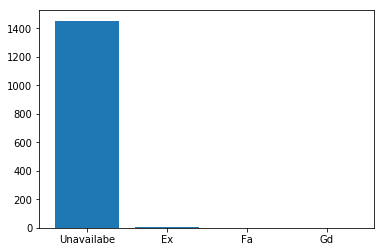

Histogram of : MiscVal


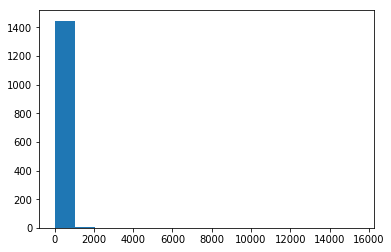

Histogram of : MoSold


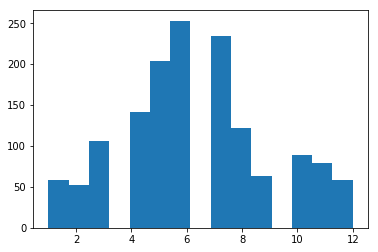

Histogram of : YrSold


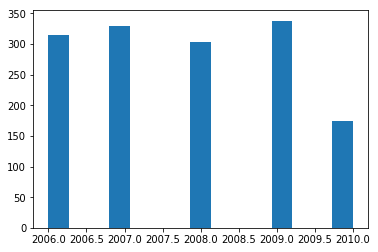

Bar graph of : SaleType


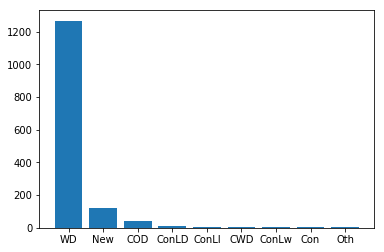

Bar graph of : SaleCondition


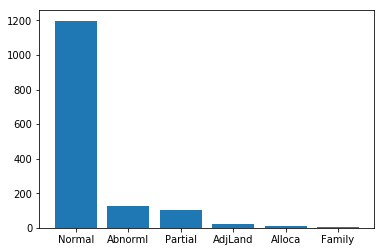

Histogram of : SalePrice


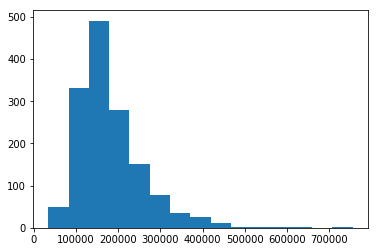

In [15]:
def plot_vars(df):
    for i in df.columns[1:]:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print('Histogram of :',i)
            plt.hist(df[i],bins=15)
            plt.show()
        else:
            print('Bar graph of :',i)
            plt.bar(df[i].unique().tolist(),df[i].value_counts().tolist())
            plt.show()
            
plot_vars(X)

Removing features that are not so correlated with the target variable:

In [16]:
def show_unimp_vars(df,max_corr):

    dfq = df.corr()

    corr = []

    for ind,row in dfq.iterrows():
        for i in row.index.tolist():
            if ind != i and abs(row[i]) > max_corr:
                if (i,ind) in corr:
                    continue
                else:
                    corr.append((ind,i))
    
    return corr


corr_list = show_unimp_vars(X, max_corr = 0.7)

Removing unnecessary features (that do not contribute much to the prediction)

In [17]:
def no_contri_vars(df,min_corr):    

    not_so_imp_vars = []

    for i in df[df.columns.difference(['SalePrice'])].columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            if (abs(df[i].corr(df['SalePrice'])) < min_corr):
                not_so_imp_vars.append(i)

    return not_so_imp_vars

unimp_vars = no_contri_vars(data,0.1)

In [18]:
corr_list

[('OverallQual', 'SalePrice'),
 ('YearBuilt', 'GarageYrBlt'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('GarageCars', 'GarageArea')]

Checking the multicollinear features' contribution to the prediction

In [19]:
print(data['SalePrice'].corr(data['1stFlrSF']))

print(data['SalePrice'].corr(data['2ndFlrSF']))

print(data['TotalBsmtSF'].corr(data['SalePrice']))

data['TotalBsmtSF'].corr(data['1stFlrSF'])

0.6058521846919147
0.3193338028320677
0.6135805515591954


0.8195299750050334

In [20]:
unimp_vars.extend(['2ndFlrSF','GarageArea','TotRmsAbvGrd','GarageYrBlt'])

Dropping the above selected variables!

In [21]:
X.drop(columns=unimp_vars,inplace=True)

Pre-processing the predictors before model-building:

In [23]:
def preprocessing_X(df):  
    
    X_ = pd.get_dummies(X)
    
    from sklearn.preprocessing import MinMaxScaler

    STS = MinMaxScaler()

    X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])
    
    return X_

X_ = preprocessing_X(X)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<b>Plotting the data to see its structure

In 2d:

[0.15344137] 



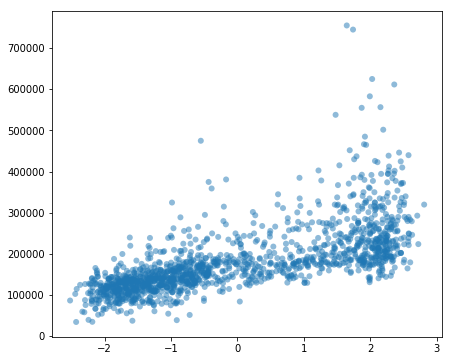

In [24]:
def pca_plot_2d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=1).fit(design_matrix)
    print(pca_plot.explained_variance_ratio_,'\n')
    pcs = pca_plot.transform(design_matrix)

    plt.figure(figsize=(7,6))
    plt.scatter(pcs,y, edgecolor='', alpha=0.5)
    plt.show()
    
pca_plot_2d_binaryclass(X_,y)

In 3d:

[0.15344137 0.06006928] 



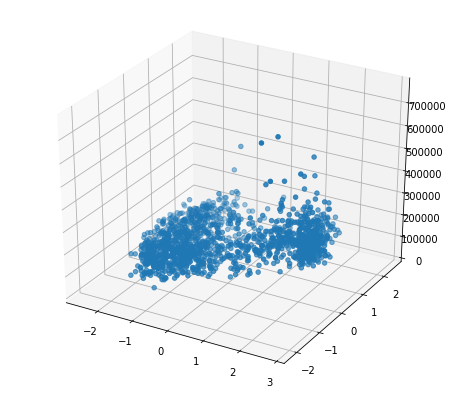

In [25]:
def pca_plot_3d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=2).fit(design_matrix)
    print(pca_plot.explained_variance_ratio_,'\n')
    pcs = pca_plot.transform(design_matrix)

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    xs = pcs[:,0] 
    ys = pcs[:,1]
    zs = target
    ax.scatter(xs,ys,zs, marker = 'o')
    plt.show()
    
pca_plot_3d_binaryclass(X_,y)

<b>Model building</b>

In [26]:
def model_built(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)
      
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression().fit(X_train,y_train)
    
    return linreg, X_train, X_test, y_train, y_test

LR,X_train, X_test, y_train, y_test = model_built(X_, y, 0.25)

In [27]:
y_pred_train = LR.predict(X_train)

y_pred_test = LR.predict(X_test)

<b>Model Evaluation</b>

In [28]:
def metrics(X_train, X_test,y_tn, y_pred_tn, y_ts, y_pred_ts):

    from sklearn.metrics import r2_score
    
    r_train = r2_score(y_tn, y_pred_tn)
    
    r_test = r2_score(y_ts, y_pred_ts)
    
    print('R squared on train data :',r_train)
    print('R squared on test data :',r_test)
    
    print('Training MSE :',sum((y_pred_tn - y_tn)**2/len(y_tn))**0.5)
    print('Test MSE :',sum((y_pred_ts - y_ts)**2/len(y_ts))**0.5)

    
metrics(X_train, X_test, y_train, y_pred_train,y_test,y_pred_test)

R squared on train data : 1.0
R squared on test data : 0.9999999937551834
Training MSE : 3.9683415770803326e-10
Test MSE : 6.136714998333078


<b>Imrpoving upon the model

Feature selection on the basis of the level of significance!

<b>RIDGE</b>

In [29]:
Rg = RidgeCV(cv=5,alphas=np.repeat(1,5))

Rg.fit(X_train, y_train)

y_r_train = Rg.predict(X_train)

y_r_test = Rg.predict(X_test)

In [30]:
metrics(X_train, X_test, y_train, y_r_train,y_test,y_r_test)

R squared on train data : 0.984731368643443
R squared on test data : 0.9746667332374052
Training MSE : 9882.848741973838
Test MSE : 12360.092140557372


So we can conclude that Ridge Regression is the best for this problem as there are correlated variables that contribute a lot to the prediction and Lasso would turn their co-efficients to zero but Ridge will just decrease the magnitude of the coefficients!

Interpretable model to predict house prices and the 10 most important features for determining house prices are:


In [33]:
import statsmodels.api as sm

X_ = sm.add_constant(X)

est = sm.OLS(y_train,X_train).fit()

In [34]:
pval = est.summary2().tables[1]

<b>20 most important factors for determining House Prices!

In [37]:
for i in pval[pval.sort_values(by=['P>|t|'])['P>|t|'] < 0.005].index.tolist()[:20]:
    
    print(i)

SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac


C:\Users\nayak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<b>FIN